In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv("C:/Users/kondr/Downloads/emails.csv")
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
ham = spam_df[spam_df['spam'] == 0]

In [8]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam = spam_df[spam_df['spam']==1]

In [10]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print("spam mails percentage",len(spam)/len(spam_df) *100,'%')

spam mails percentage 23.88268156424581 %


In [12]:
print("legit mails percentage",len(ham)/len(spam_df) *100,'%')

legit mails percentage 76.11731843575419 %


<Axes: xlabel='spam', ylabel='count'>

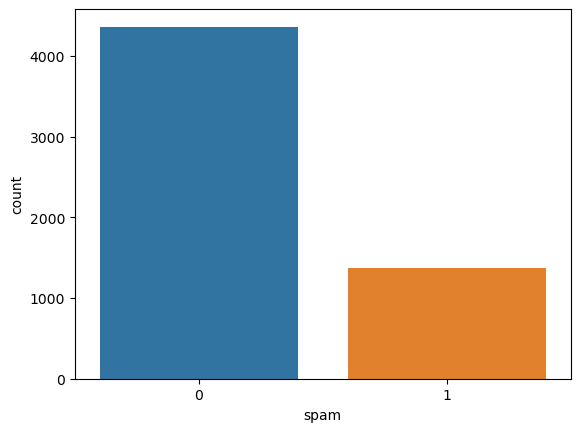

In [13]:
sns.countplot(data = spam_df, x = 'spam')

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spam_ham_vectorizer = vectorizer.fit_transform(spam_df['text']).toarray()

In [15]:
features=(vectorizer.get_feature_names_out())

In [16]:
df_bow = pd.DataFrame(spam_ham_vectorizer, columns=features)

In [17]:
spam_ham_vectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
spam_ham_vectorizer.shape

(5728, 37303)

In [19]:
label = spam_df['spam'].values

In [20]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.naive_bayes import MultinomialNB
NB_Classifier=MultinomialNB()
NB_Classifier.fit(spam_ham_vectorizer,label)

MultinomialNB()

In [22]:
testing_sample = ['Free Money!!!',
                  'Hi Jane, Please let me know if you want to modify our project.']

test_sample_vectorizer = vectorizer.transform(testing_sample)

In [23]:
test_pred = NB_Classifier.predict(test_sample_vectorizer)
test_pred

array([1, 0], dtype=int64)

In [24]:
testing_sample = ['Hello, I am Boo, I would like to book a hotel in Bali by January 24th',
                  'money vaigra!!']

test_sample_vectorizer = vectorizer.transform(testing_sample)

test_pred = NB_Classifier.predict(test_sample_vectorizer)
test_pred

array([0, 1], dtype=int64)

In [25]:
X=spam_ham_vectorizer
y=label

In [26]:
X.shape

(5728, 37303)

In [27]:
y.shape

(5728,)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
NB_classifier.score(X_train, y_train)

0.9967263203841118

In [31]:
NB_classifier.score(X_test, y_test)

0.9860383944153578

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
y_pred_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[3480,   14],
       [   1, 1087]], dtype=int64)

In [34]:
y_pred_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[852,  14],
       [  2, 278]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       866
           1       0.95      0.99      0.97       280

    accuracy                           0.99      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

